In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
dataset = pd.read_csv('GameStats.csv')
x=dataset.iloc[:-1,:-1 ].values
y=dataset.iloc[:, -1].values


In [ ]:
dataset

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,Level_520,30,False,1.579998,150,0.000000
1,9/7/2019 2:44:46 PM,Level_520,30,False,3.805001,100,0.000000
2,9/7/2019 2:59:20 PM,Level_520,30,False,1.783006,50,0.000000
3,9/7/2019 2:59:28 PM,Level_520,30,True,0.263020,0,0.000000
4,9/7/2019 2:59:48 PM,Level_520,30,True,3.318019,50,0.000000
...,...,...,...,...,...,...,...
6809,9/9/2019 10:02:06 AM,Level_715,42,False,0.446003,50,0.379967
6810,9/9/2019 10:02:36 AM,Level_715,42,True,29.362510,4050,0.390205
6811,9/9/2019 10:03:08 AM,Level_798,50,True,32.295620,4000,0.325681
6812,9/9/2019 10:03:29 AM,Level_846,18,False,20.059530,1300,0.332798


Since the game was played at 4x speed, we will multiply this value by 4 to make it more human understandable

In [ ]:
dataset['ElapsedTime'] = dataset['ElapsedTime']*4


In [ ]:
dataset

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,Level_520,30,False,6.319992,150,0.000000
1,9/7/2019 2:44:46 PM,Level_520,30,False,15.220004,100,0.000000
2,9/7/2019 2:59:20 PM,Level_520,30,False,7.132024,50,0.000000
3,9/7/2019 2:59:28 PM,Level_520,30,True,1.052081,0,0.000000
4,9/7/2019 2:59:48 PM,Level_520,30,True,13.272076,50,0.000000
...,...,...,...,...,...,...,...
6809,9/9/2019 10:02:06 AM,Level_715,42,False,1.784012,50,0.379967
6810,9/9/2019 10:02:36 AM,Level_715,42,True,117.450040,4050,0.390205
6811,9/9/2019 10:03:08 AM,Level_798,50,True,129.182480,4000,0.325681
6812,9/9/2019 10:03:29 AM,Level_846,18,False,80.238120,1300,0.332798


In [ ]:
columns_to_remove = ['Date']

# Remove unwanted columns
df = dataset.drop(columns=columns_to_remove)

df['Level'] = df['Level'].str.replace('Level_', '').astype(int)
print(df)

      Level  NumBlocks  IsWin  ElapsedTime  Score  Accuracy
0       520         30  False     6.319992    150  0.000000
1       520         30  False    15.220004    100  0.000000
2       520         30  False     7.132024     50  0.000000
3       520         30   True     1.052081      0  0.000000
4       520         30   True    13.272076     50  0.000000
...     ...        ...    ...          ...    ...       ...
6809    715         42  False     1.784012     50  0.379967
6810    715         42   True   117.450040   4050  0.390205
6811    798         50   True   129.182480   4000  0.325681
6812    846         18  False    80.238120   1300  0.332798
6813    609         62  False    38.039976   2100  0.381122

[6814 rows x 6 columns]


In [ ]:
x = df.iloc[:, :-1]

In [ ]:
print(x)

      Level  NumBlocks  IsWin  ElapsedTime  Score
0       520         30  False     6.319992    150
1       520         30  False    15.220004    100
2       520         30  False     7.132024     50
3       520         30   True     1.052081      0
4       520         30   True    13.272076     50
...     ...        ...    ...          ...    ...
6809    715         42  False     1.784012     50
6810    715         42   True   117.450040   4050
6811    798         50   True   129.182480   4000
6812    846         18  False    80.238120   1300
6813    609         62  False    38.039976   2100

[6814 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [ ]:
print(x_train)

      Level  NumBlocks  IsWin  ElapsedTime  Score
1304    519         21   True     43.49932   1500
5107    609         62  False     54.03596   3650
3022    660         28   True    102.01600   2600
6662    378         27  False     20.04000   1200
6703    494         39   True     81.34400   2100
...     ...        ...    ...          ...    ...
905     492        110   True    339.53900  11500
5192    660         28   True     64.52000   2600
3980    380         32   True    165.04640   3600
235     849         43   True     48.33788   3650
5157    715         42  False     44.44792   1700

[5451 rows x 5 columns]


In [ ]:
print(x_test)

      Level  NumBlocks  IsWin  ElapsedTime  Score
4697    849         43  False     4.120152    150
3715    379         28   True    52.206880   1400
2311    715         42   True   128.320600   4050
5488    491         35   True   100.700000   1750
1536    519         21   True    71.207040   1500
...     ...        ...    ...          ...    ...
2379    849         43  False    57.382640   1100
2968    604         56   True    99.000040   3000
2646    378         27   True    98.488640   3050
4245    596         50   True   119.358840   4000
1941    848         48   True   232.850160   4800

[1363 rows x 5 columns]


In [ ]:
print(y_train)

[0.3773959 0.315291  0.3313022 ... 0.317085  0.3857721 0.3369974]


In [ ]:
print(y_test)

[0.3018697 0.3289368 0.3670027 ... 0.3766563 0.365569  0.3399937]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.48981572 -1.03214871  1.04638759 -0.03030025 -0.46268042]
 [ 0.07161933  0.9551864  -0.95566883 -0.03030025  0.65943461]
 [ 0.38976586 -0.6928476   1.04638759 -0.03030025  0.11142495]
 ...
 [-1.35692097 -0.49896125  1.04638759 -0.03030024  0.63333891]
 [ 1.56877947  0.03422622  1.04638759 -0.03030025  0.65943461]
 [ 0.73286506 -0.01424536 -0.95566883 -0.03030025 -0.35829762]]


In [ ]:
print(x_test)

[[ 1.56877947  0.03422622 -0.95566883 -0.03030026 -1.16726427]
 [-1.36315914 -0.6928476   1.04638759 -0.03030025 -0.51487181]
 [ 0.73286506 -0.01424536  1.04638759 -0.03030024  0.8682002 ]
 ...
 [-1.3693973  -0.74131919  1.04638759 -0.03030025  0.34628623]
 [-0.00947684  0.37352734  1.04638759 -0.03030024  0.8421045 ]
 [ 1.56254131  0.27658416  1.04638759 -0.03030023  1.25963567]]


In [ ]:
x = df[['Level','NumBlocks','ElapsedTime','Score','Accuracy']]
y = df['IsWin']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.64823022 -0.1622015  -0.03030025 -0.25285453 -0.69494832]
 [ 0.39161017 -0.69152358 -0.03030024  0.10747451  0.86920036]
 [-0.66702251 -0.35468225 -0.03030025 -0.33006789  0.93728062]
 ...
 [-0.65449432  0.65584172 -0.03030025  0.49354133 -0.85685074]
 [-0.48536365 -0.64340339 -0.03030025 -0.3043301   1.29613743]
 [ 1.55673253 -1.17272547 -0.03030024 -0.45875683 -0.97526525]]


In [ ]:
print(x_test)

[[-0.49162775 -1.0283649  -0.03030025 -0.45875683  0.09240821]
 [ 0.07214113  0.94456285 -0.03030024  0.93108372 -1.26433844]
 [ 1.56926073  0.27088021 -0.03030023  1.23993718  1.09053755]
 ...
 [ 0.39161017 -0.69152358 -0.03030024  0.10747451  0.97575127]
 [-0.49162775 -1.0283649  -0.03030026 -1.20515268 -0.66761683]
 [ 0.04082064  0.65584172 -0.03030026 -0.92203701  0.49592342]]


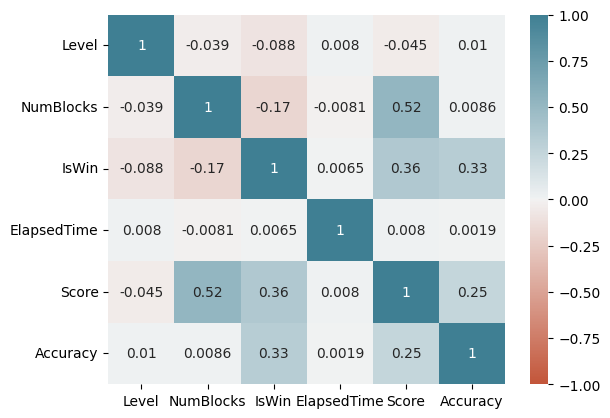

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)
plt.show()

In [ ]:
score = df['Score']
accuracy = df['Accuracy']
nblocks = df['NumBlocks']


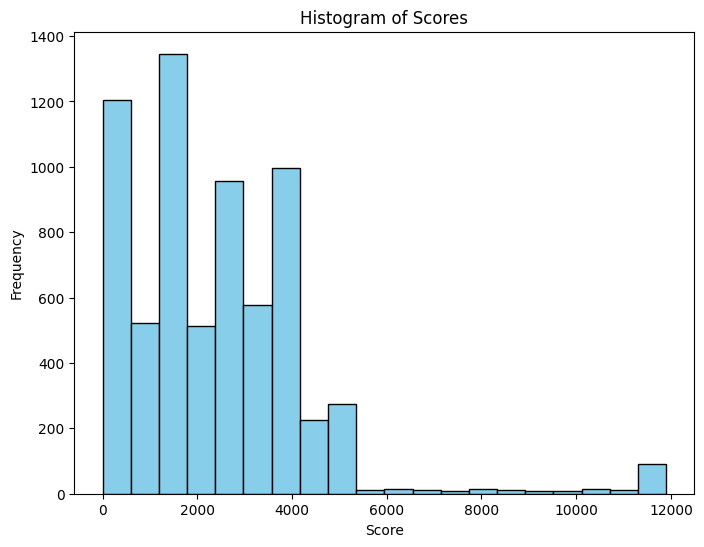

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(score, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

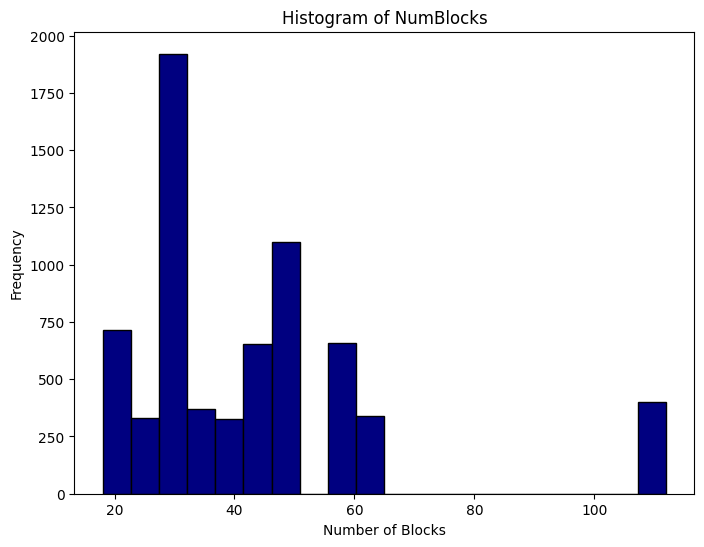

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(nblocks, bins=20, color='navy', edgecolor='black')
plt.xlabel('Number of Blocks')
plt.ylabel('Frequency')
plt.title('Histogram of NumBlocks')
plt.show()

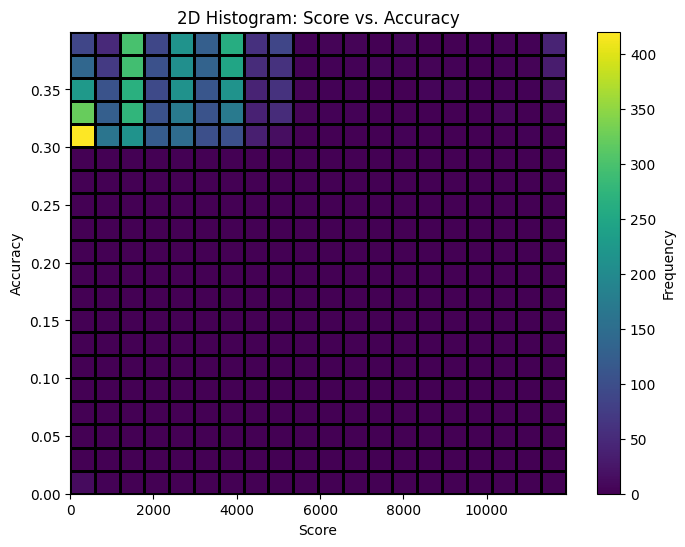

In [ ]:
plt.figure(figsize=(8,6))
plt.hist2d(score, accuracy, bins=(20,20), color='skyblue', edgecolor='black')
plt.colorbar(label='Frequency')
plt.xlabel('Score')
plt.ylabel('Accuracy')
plt.title('2D Histogram: Score vs. Accuracy')
plt.show()

In [ ]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test,  y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9236977256052825
Confusion Matrix
[[616 100]
 [  4 643]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.86      0.92       716
        True       0.87      0.99      0.93       647

    accuracy                           0.92      1363
   macro avg       0.93      0.93      0.92      1363
weighted avg       0.93      0.92      0.92      1363



<function matplotlib.pyplot.show(close=None, block=None)>

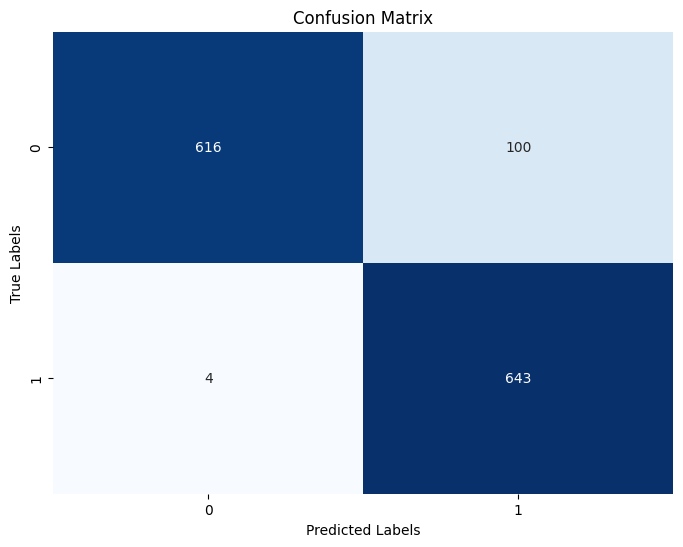

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot =True, fmt='d',cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

Visualizing the Trainning set results

<ipython-input-140-f23acd17c395>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


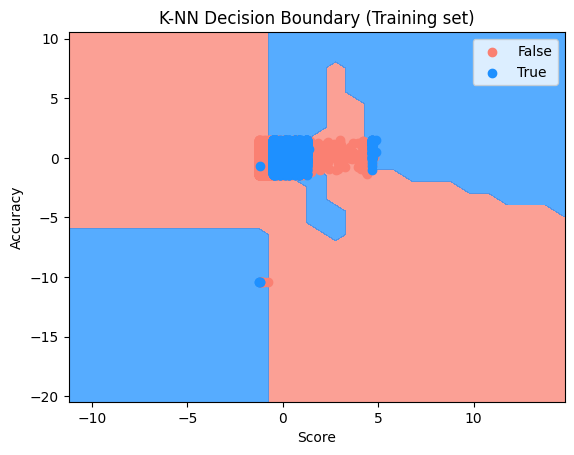

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train[:, [3, 4]], y_train  # Selecting the "score" and "accuracy" columns
k = 5  # Number of neighbors to consider (you can adjust this)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_set, y_set)
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=1),
                     np.arange(start=x_set[:, 1].min() - 10, stop=x_set[:, 1].max() + 10, step=1))
Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('K-NN Decision Boundary (Training set)')
plt.xlabel('Score')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Visualizing the Test set results

<ipython-input-141-83b756096d1d>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)


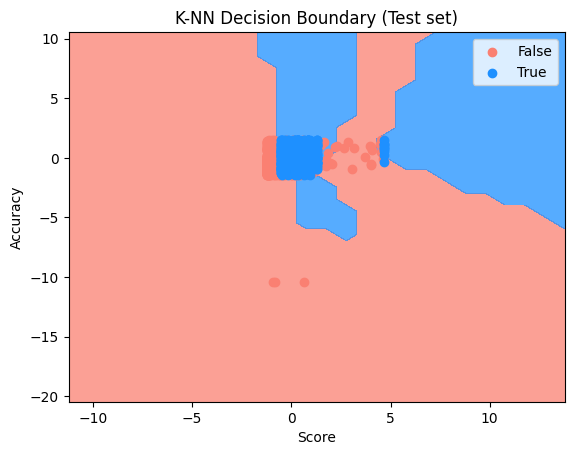

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test[:, [3, 4]], y_test  # Selecting the "score" and "accuracy" columns
k = 5  # Number of neighbors to consider (you can adjust this)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_set, y_set)
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=1),
                     np.arange(start=x_set[:, 1].min() - 10, stop=x_set[:, 1].max() + 10, step=1))
Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('K-NN Decision Boundary (Test set)')
plt.xlabel('Score')
plt.ylabel('Accuracy')
plt.legend()
plt.show()